# Plotting in Julia
This is an introduction to Plots in Julia using the Plots library and pyplot() backend.
<br>Author of the notebook : [Deeptendu Santra](https://github.com/Dsantra92)

In [1]:
# Use this if the libraries are not pre-installed
import Pkg
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("LaTeXStrings")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


In [2]:
using Plots;pyplot()

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


Plots.PyPlotBackend()

In [3]:
using Random
Random.seed!(123);

## Basic Plots

###  1. Line Plot

In [4]:
X = rand(10, 2);

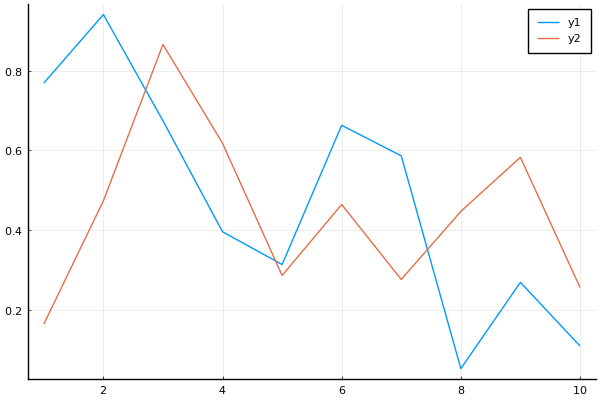

In [5]:
p = plot(X)

### 2. Barplot

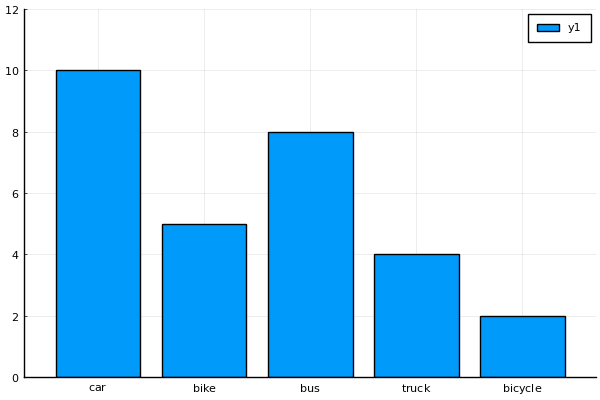

In [6]:
x = [" car ", " bike ", " bus ", " truck ", " bicycle "]  #labels of the data

y = [10, 5, 8, 4, 2]                                      #values

bar(x, y, lengend = false)                                #we can choose to show/hide the legend

ylims!(0,12)                                              #set the ylims of the current plot

### 3. Histogram

In [7]:
x = randn(1000);                               #Generating Random data i.i.d from Normal Distribution

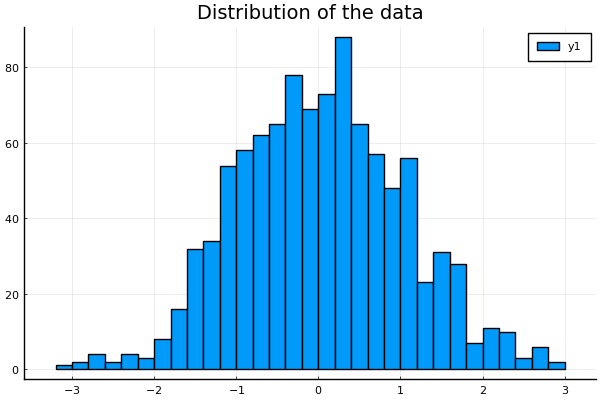

In [8]:
histogram(x, bins = 50)                        #Try changing the bins of the plot

title!("Distribution of the data")             #We can add title to plots using title!

**Try on your own** : Hide the `legend` of the plot above

### 4. Pie Plot

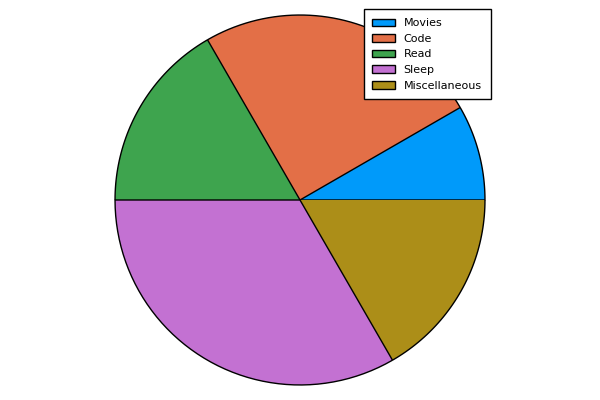

In [9]:
x = ["Movies", "Code", "Read", "Sleep", "Miscellaneous"]

y = [2, 6, 4, 8, 4];

pie(x,y)

# Adding some features to these basic plots

## Tweaking the Line Plot

### We will add/tweak the following components :

**Line Width** - `lw`/`linewidth`<br>
**Line Color** - `lc`/`linecolor`<br>
**Lables** - `labels`

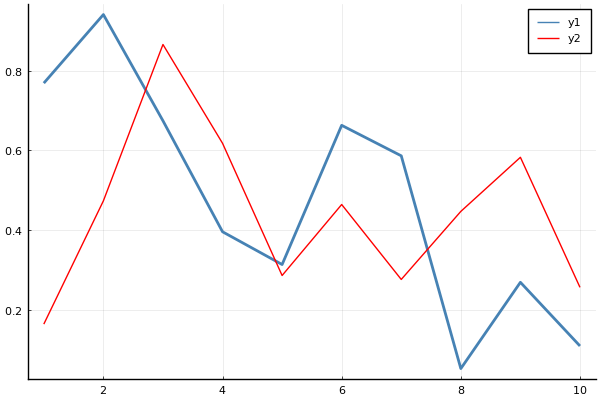

In [10]:
plot(X, linecolor = [:steelblue :red], linewidth = [2 1])

**Maker Shape** - `markershape`<br>
**Marker Size** - `markersize`

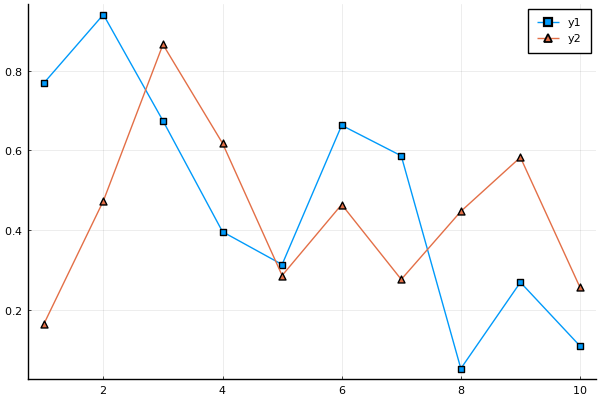

In [11]:
plot(X, markershape = [:square :utriangle ], markersize = [4 5])

You can use all commands together but Plot makes it easier for us. It's called Magic Args

In [12]:
# Specify the values for line and marker in the tuple in any order and it works.Uncomment the next line and try.


# plot(X, marker = ([:square :utriangle], [:blue :red], [5 7], 0.5), line = ([2 1], [:steelblue :red],[0.7 1]), label = ["Series1" "Series2"])


## Let's Plot some functions

In [13]:
using LaTeXStrings                     #Use LaTeX format which is widely used for writing matheamtic symbols

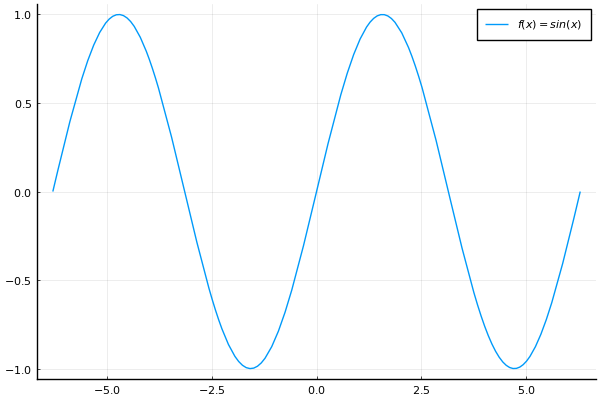

In [14]:
# Lets plot Sin function for values -2π to 2π

plot(sin,-2*pi,2*pi, label = L"f(x) = sin(x)", size= (600,400))      #you only need to define the end points

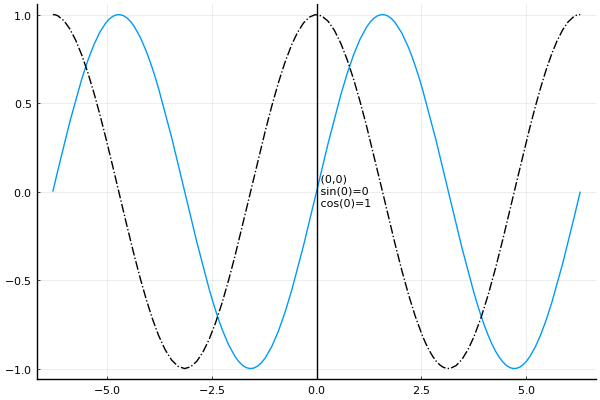

In [15]:
plot!(cos, -2*pi,2*pi, label = L"\phi(x) = cos(x)", line = (:black, :dashdot))  # plot! draws the plot on the top of previous plot

annotate!(0,0, Plots.text(" (0,0)\n sin(0)=0\n cos(0)=1",:left,8))     #Making text annotations to the existing plot

vline!([0],lc = :black, leg = false)                       #Adding a vertical line.You can try hline! as well

### Using Generator Functions

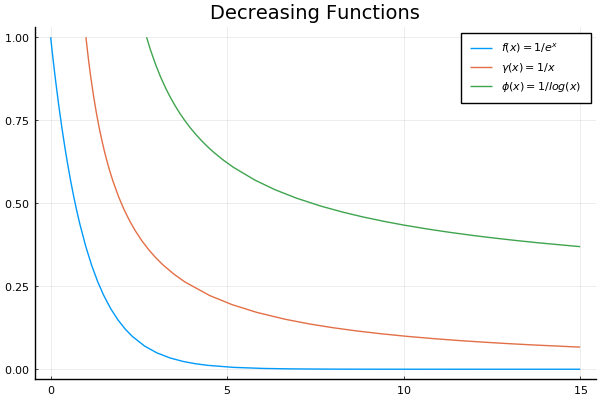

In [16]:
plot((x -> 1/exp(x)), 0, 15,  label = L"f(x)=1/e^x" )        # L"<string>" is for using the latex format

plot!((x -> 1/x),      1, 15, label = L"γ(x)=1/x" )

plot!((x -> 1/log(x)), ℯ, 15, label = L"ϕ(x) = 1/log(x)" )

title!("Decreasing Functions")

## Plotting different function in same plot

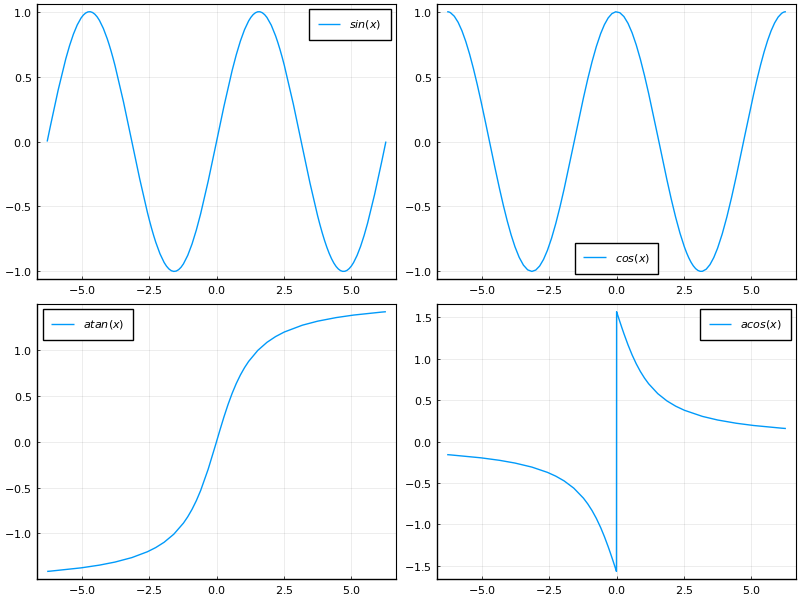

In [17]:
a = plot(sin,-2*pi,2*pi, label = L"sin(x)")
b = plot(cos, -2*pi,2*pi, label = L"cos(x)")

c = plot(atan, -2*pi,2*pi, label = L"atan(x)")
d = plot(acot, -2*pi,2*pi, label = L"acos(x)")

plot(a,b,c,d, size = (800,600), framestyle = :box)    #Notice : We dont need subplot function Plots does it for us

In [18]:
#Let us save this plot
png("Tringonometric_functions")

# Plots in 2D Dimensions

# Scatter Plot 

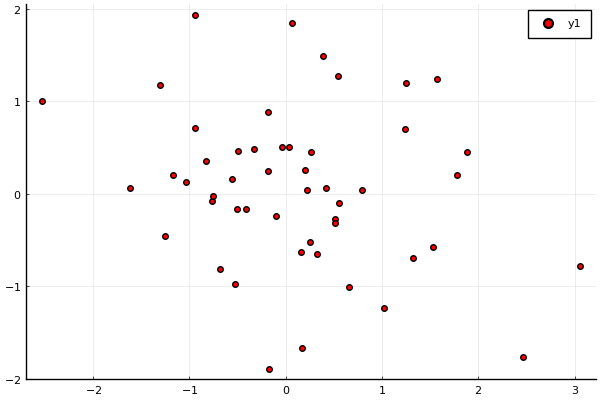

In [19]:
x = randn(50)
y = randn(50)

scatter(x,y, c = :red)       #To estimate the distri bution of data along 2 dimensions

## 2D Histogram

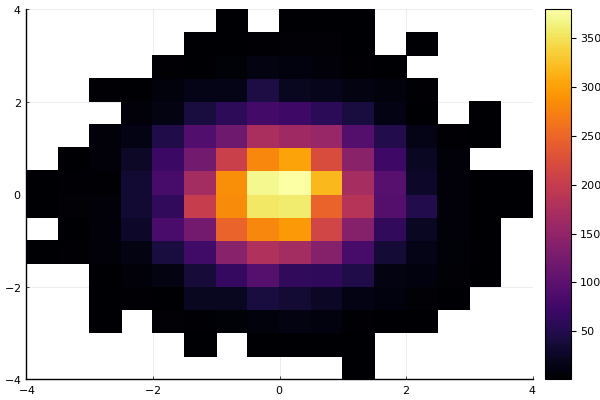

In [20]:
histogram2d(randn(10000), randn(10000), nbins = 20)          #Plotting a Bivariate Normal Distribution

## HeatMap

In [21]:
X = [(1/(x+y)) for x in 1:5 ,y in 1:7]

5×7 Array{Float64,2}:
 0.5       0.333333  0.25      0.2       0.166667  0.142857   0.125    
 0.333333  0.25      0.2       0.166667  0.142857  0.125      0.111111 
 0.25      0.2       0.166667  0.142857  0.125     0.111111   0.1      
 0.2       0.166667  0.142857  0.125     0.111111  0.1        0.0909091
 0.166667  0.142857  0.125     0.111111  0.1       0.0909091  0.0833333

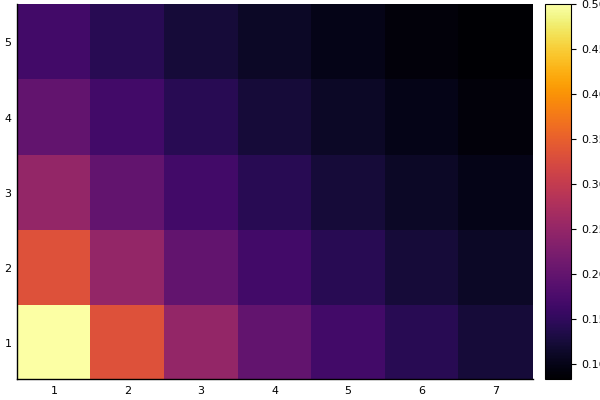

In [22]:
heatmap(X,colorbar = :true)

## Contours


In [23]:
foo(x, y) = 0.5 * sin(x) + 0.25 * cos(y)^2

foo (generic function with 1 method)

In [24]:
X = Y = 0:0.01:2*π

0.0:0.01:6.28

In [25]:
vals = [foo(x,y) for x in X,y in Y];

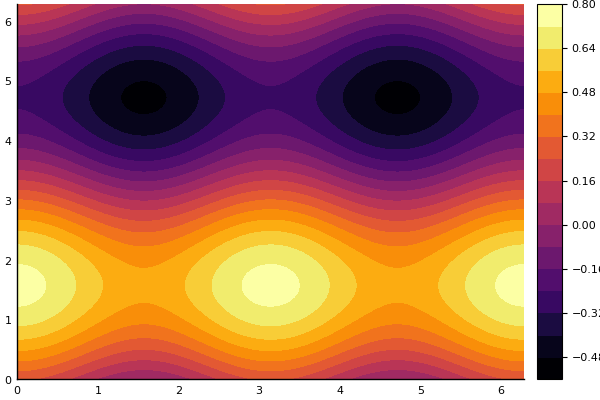

In [26]:
contourf(X, Y, vals, la =1)
#contour!(grid, grid, values ,color = :black)

## Surface Plot

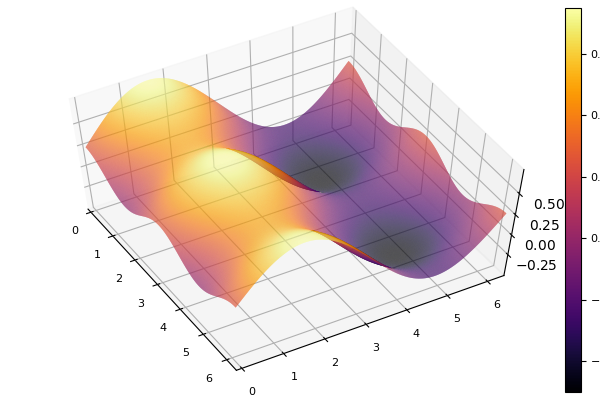

In [27]:
surface(X, Y, vals, camera = (60,60))

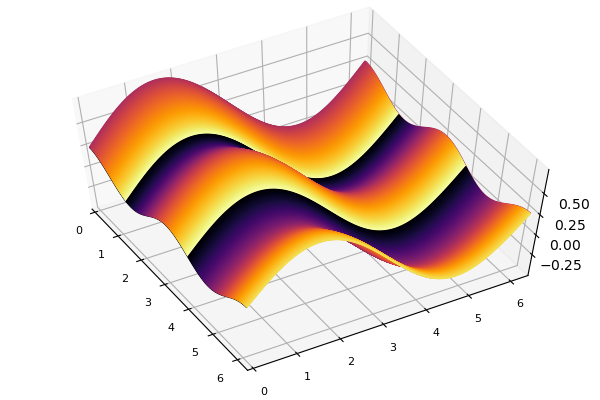

In [28]:
wireframe(X, Y, vals, camera = (60,60))

## Radial Plot

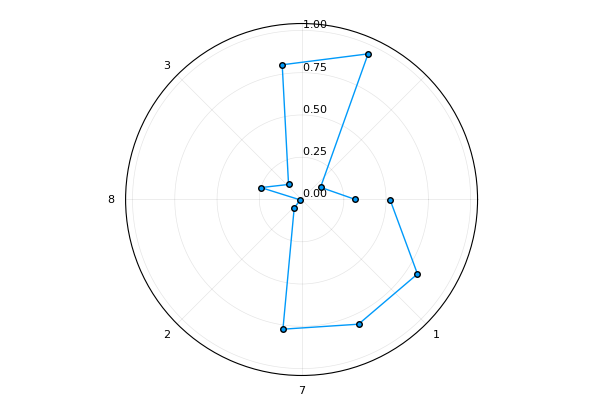

In [29]:
x = rand(12)

angle = range(0, length = length(x), stop = 2*π)

plot(angle, x, proj = :polar, markershape = :circle, legend = false)

# More Features

# Layout

Julia Plots package lets you things that may seem quite intutive but is diffcult to do with other plot packages.
For example setting the layout for the subplots that too with easy few lines of macro `@layout`

In [30]:
data = randn(100, 4)                        # We take 4 random sets of data of size 100 each

print(size(data))

(100, 4)

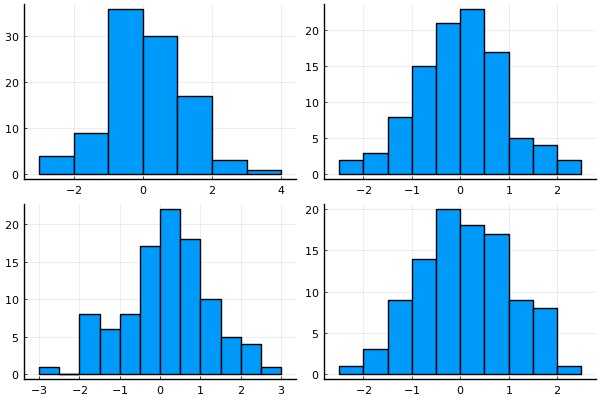

In [31]:
histogram(data, layout = 4, leg = false)   #We say there are 4 plots for the package to plot

#Try removing the layout options or giving it higher or lower values

**We just mentioned there will be 4 plots.Plots automatically does it in 2x2 matrix rather than single row or column.<br>Plots can do much more editing for you than that.**

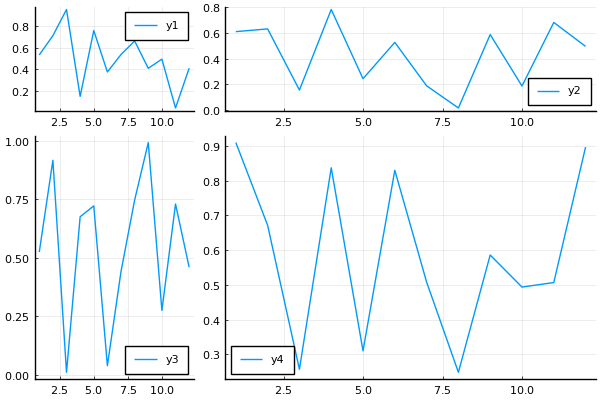

In [32]:
plot(rand(12,4), layout = @layout[a{0.3w} b
                        c{0.7h} d])                               

#We have used the layout macro.We can set how much of width,or length each plot will be occupying by specifying it
# using {0.5w,0.5h}. 

**More more customization!!!**

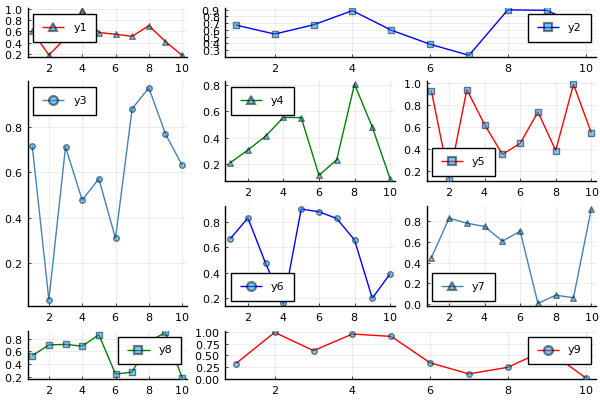

In [33]:
l =  layout = @layout[
        a{0.3w} b
        c{0.7h} grid(2,2)
        d e
        ]                               #This is the layout we will be using.Refer to Julia 2D arrays for more 

plot(rand(10,9),layout = l, lc = [:red :blue :steelblue :green ], marker =([:utriangle :square :circle], 0.5))

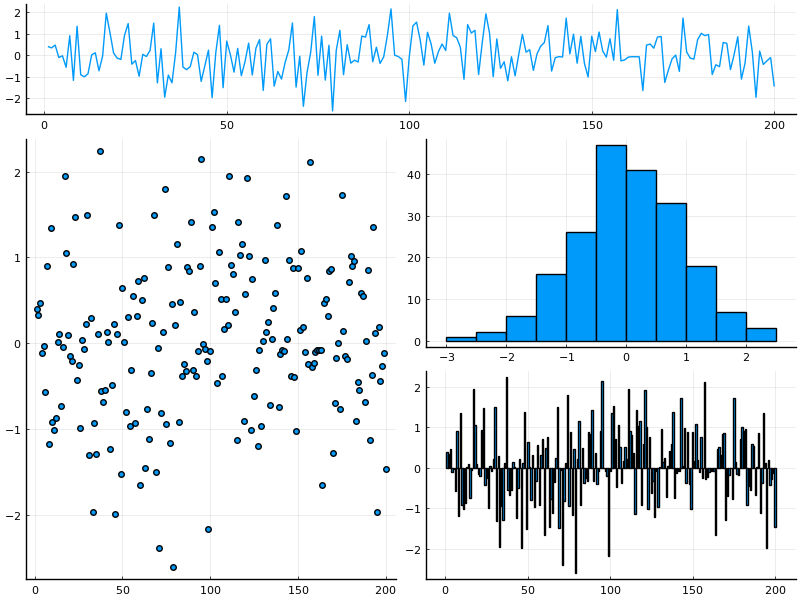

In [34]:
l = @layout([a{0.2h}; b [c; d ]])

X = randn(200)

p = plot(X,layout = l, t = [:line, :scatter, :histogram, :bar ],legend =false, size = (800,600))

In [35]:
png(p, "Analysis")          #You can specify which plot to save 

## What's next ? Let's Magnify

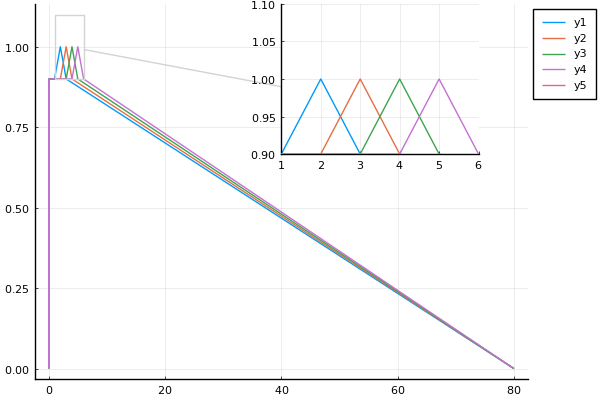

In [36]:
begin
    plot([(0, 0), (0, 0.9), (1, 0.9), (2, 1), (3, 0.9), (80, 0)], legend = :outertopright)
    plot!([(0, 0), (0, 0.9), (2, 0.9), (3, 1), (4, 0.9), (80, 0)])
    plot!([(0, 0), (0, 0.9), (3, 0.9), (4, 1), (5, 0.9), (80, 0)])
    plot!([(0, 0), (0, 0.9), (4, 0.9), (5, 1), (6, 0.9), (80, 0)])
    lens!([1, 6], [0.9, 1.1], inset = (1, bbox(0.5, 0.0, 0.4, 0.4)))
end


Some of our plots are inspired from the examples of Julia [Plots official documentation](https://docs.juliaplots.org/latest/).You can surely check it out to explore more features Plots has for you.